In [3]:
# Import required libraries
import pandas as pd
import os
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the csv file 
df = pd.read_csv('Keyword.csv')

In [5]:
def extract_date(filename):
    try:
        return filename.split('-')[1]
    except:
        return 'Unknown'
df['Date'] = df.iloc[:, 0].apply(extract_date)

In [6]:
#Extracting the csv file data and dropping NA fields 
def extract_unique_keywords(dataframe):
    keyword_columns = [col for col in dataframe.columns if col.startswith('Keyword ')]
    
    all_keywords = set()
    for col in keyword_columns:
        keywords = dataframe[col].dropna().unique()
        all_keywords.update(keywords)
    
    return sorted(list(all_keywords))


In [91]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       55 non-null     object
 1   Keyword 1   49 non-null     object
 2   Keyword 2   49 non-null     object
 3   Keyword 3   49 non-null     object
 4   Keyword 4   49 non-null     object
 5   Keyword 5   49 non-null     object
 6   Keyword 6   48 non-null     object
 7   Keyword 7   48 non-null     object
 8   Keyword 8   48 non-null     object
 9   Keyword 9   46 non-null     object
 10  Keyword 10  44 non-null     object
 11  Keyword 11  20 non-null     object
 12  Keyword 12  11 non-null     object
 13  Date        66 non-null     object
dtypes: object(14)
memory usage: 7.3+ KB
None


In [93]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
                                               Title  \
0                                              3-Feb   
1                                                NaN   
2  Meta-Analyses of Financial Performance and Equ...   
3  Home Country Environments, Corporate Diversifi...   
4  Safeguarding Investments in Asymmetric Interor...   

                       Keyword 1                 Keyword 2  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                         EQUITY  ORGANIZATIONAL sociology   
3    DIVERSIFICATION in industry         BUSINESS planning   
4  INTERORGANIZATIONAL relations      INTERGROUP relations   

                Keyword 3               Keyword 4          Keyword 5  \
0                     NaN                     NaN                NaN   
1                     NaN                     NaN                NaN   
2             PERFORMANCE           META-analysis      PSYC

In [95]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(df)
pd.reset_option('display.max_rows')

                                                Title  \
0                                               3-Feb   
1                                                 NaN   
2   Meta-Analyses of Financial Performance and Equ...   
3   Home Country Environments, Corporate Diversifi...   
4   Safeguarding Investments in Asymmetric Interor...   
5   Managerialist and Human Capital Explanations f...   
6   Bidding Wars Over R&D-Intensive Firms: Knowled...   
7   When “The Show Must Go On”: Surface Acting and...   
8   Relationships among Supervisors' and Subordina...   
9   Punctuated Equilibrium and Linear Progression:...   
10                                                NaN   
11                                              3-Apr   
12                                                NaN   
13  The Relationship between Overconfidence and th...   
14  Governance Through Ownership: Centuries of Pra...   
15  Strategic Satisficing? A Behavioral-Agency The...   
16  Exploring the Agency Conseq

In [11]:
print("\nDataset Dimensions:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")




Dataset Dimensions:
Number of rows: 66
Number of columns: 14


In [13]:
print("\nBasic Statistical Summary:")
print(df.describe())


Basic Statistical Summary:
        Title                Keyword 1               Keyword 2  \
count      55                       49                      49   
unique     55                       40                      42   
top     3-Feb  ORGANIZATIONAL behavior  TEAMS in the workplace   
freq        1                        3                       3   

                  Keyword 3              Keyword 4   Keyword 5  \
count                    49                     49          49   
unique                   44                     43          45   
top     EMPLOYEE motivation  INDUSTRIAL management  MANAGEMENT   
freq                      2                      3           3   

                 Keyword 6           Keyword 7                Keyword 8  \
count                   48                  48                       48   
unique                  39                  38                       35   
top     MANAGEMENT science  MANAGEMENT science  ORGANIZATIONAL behavior   
freq      

In [15]:
#spliting the data by dates. 
df = pd.read_csv('Keyword.csv')

def extract_date(filename):
    try:
        return filename.split('-')[1]
    except:
        return 'Unknown'

df['Date'] = df.iloc[:, 0].apply(extract_date)

def extract_unique_keywords(dataframe):
    keyword_columns = [col for col in dataframe.columns if col.startswith('Keyword ')]
    
    all_keywords = set()
    for col in keyword_columns:
        keywords = dataframe[col].dropna().unique()
        all_keywords.update(keywords)
    
    return sorted(list(all_keywords))

# Remove indentation
pd.set_option('display.max_rows', None)
print(df)
pd.reset_option('display.max_rows')

                                                Title  \
0                                               3-Feb   
1                                                 NaN   
2   Meta-Analyses of Financial Performance and Equ...   
3   Home Country Environments, Corporate Diversifi...   
4   Safeguarding Investments in Asymmetric Interor...   
5   Managerialist and Human Capital Explanations f...   
6   Bidding Wars Over R&D-Intensive Firms: Knowled...   
7   When “The Show Must Go On”: Surface Acting and...   
8   Relationships among Supervisors' and Subordina...   
9   Punctuated Equilibrium and Linear Progression:...   
10                                                NaN   
11                                              3-Apr   
12                                                NaN   
13  The Relationship between Overconfidence and th...   
14  Governance Through Ownership: Centuries of Pra...   
15  Strategic Satisficing? A Behavioral-Agency The...   
16  Exploring the Agency Conseq

In [23]:
#Task 2
def extract_unique_keywords(dataframe):
    """
    Extract all unique keywords from the dataframe
    """
    # Collecting keywords from columns Keyword 1 to Keyword 123
    keyword_columns = [col for col in dataframe.columns if col.startswith('Keyword ')]
    
    # Flatten and get unique keywords
    all_keywords = set()
    for col in keyword_columns:
        keywords = dataframe[col].dropna().unique()
        all_keywords.update(keywords)
    
    return sorted(list(all_keywords))

def create_adjacency_matrix(dataframe, keywords):
    """
    Create adjacency matrix based on keyword co-occurrence in articles
    """
    # Initializing the adjacency matrix
    n = len(keywords)
    adjacency_matrix = np.zeros((n, n))
    
    # Keyword columns
    keyword_columns = [col for col in dataframe.columns if col.startswith('Keyword ')]
    
    # Track articles
    for _, row in dataframe.iterrows():
        # Get keywords for this article
        article_keywords = [row[col] for col in keyword_columns if pd.notna(row[col])]
        
        # Create edges between all pairs of keywords in this article
        for i in range(len(article_keywords)):
            for j in range(i+1, len(article_keywords)):
                idx1 = keywords.index(article_keywords[i])
                idx2 = keywords.index(article_keywords[j])
                
                # Increment the adjacency matrix
                adjacency_matrix[idx1, idx2] += 1
                adjacency_matrix[idx2, idx1] += 1
    
    return adjacency_matrix

# Extracting unique keywords
keywords = extract_unique_keywords(df)

# Creating adjacency matrix
adjacency_matrix = create_adjacency_matrix(df, keywords)

# Print basic information
print("Number of Unique Keywords:", len(keywords))
print("\nAdjacency Matrix Shape:", adjacency_matrix.shape)
print("\nTotal Co-occurrences:", np.sum(adjacency_matrix))

# Print first few keywords
print("\nFirst 10 Keywords:")
for i, keyword in enumerate(keywords[:10], 1):
    print(f"{i}. {keyword}")

# Saving adjacency matrix to CSV with keywords as index and columns
adjacency_df = pd.DataFrame(adjacency_matrix, 
                            index=keywords, 
                            columns=keywords)
adjacency_df.to_csv('keyword_adjacency_matrix.csv')
print("\nAdjacency matrix saved to keyword_adjacency_matrix.csv")

# Display first 10 rows of the adjacency matrix
print("\nFirst 10 Rows of Adjacency Matrix:")
print(adjacency_df.head(10))

        

Number of Unique Keywords: 248

Adjacency Matrix Shape: (248, 248)

Total Co-occurrences: 4878.0

First 10 Keywords:
1. AGENCY theory
2. AGGRESSION (Psychology)
3. AMBIVALENCE
4. ANGER in the workplace
5. BEHAVIORAL research
6. BOARDS of directors
7. BREAK-even analysis
8. BURNOUT (Psychology)
9. BUSINESS communication
10. BUSINESS enterprises

Adjacency matrix saved to keyword_adjacency_matrix.csv

First 10 Rows of Adjacency Matrix:
                         AGENCY theory  AGGRESSION (Psychology)  AMBIVALENCE  \
AGENCY theory                      0.0                      0.0          0.0   
AGGRESSION (Psychology)            0.0                      0.0          0.0   
AMBIVALENCE                        0.0                      0.0          0.0   
ANGER in the workplace             0.0                      1.0          0.0   
BEHAVIORAL research                0.0                      0.0          0.0   
BOARDS of directors                1.0                      0.0          0.0   
BR

In [25]:
matrix_df = pd.read_csv('keyword_adjacency_matrix.csv', index_col=0)

# Get matrix dimensions
rows, cols = matrix_df.shape
print(f"Matrix Dimensions: {rows} x {cols}")

# Displaying summary statistics
print("\nSummary of Co-occurrence Matrix:")
print(f"Total unique keywords: {len(matrix_df.columns)}")
print(f"Total co-occurrences: {matrix_df.values.sum()}")

# Finding top co-occurring keywords
def find_top_cooccurrences(matrix, top_n=20):
    # Creating a mask for the upper triangle to avoid duplicates
    mask = np.triu(np.ones(matrix.shape), k=1).astype(bool)
    
    # Get co-occurrence values
    cooccurrences = matrix.values[mask]
    row_indices, col_indices = np.where(mask)
    
    # Creating a list of tuples (keyword1, keyword2, co-occurrence)
    keyword_pairs = [(matrix.index[row_indices[i]], 
                      matrix.columns[col_indices[i]], 
                      cooccurrences[i]) 
                     for i in range(len(cooccurrences))]
    
    # Sorting and return top co-occurrences
    return sorted(keyword_pairs, key=lambda x: x[2], reverse=True)[:top_n]

# Find and print top co-occurrences
top_cooccurrences = find_top_cooccurrences(matrix_df)
print("\nTop 20 Keyword Co-occurrences:")
for keyword1, keyword2, count in top_cooccurrences:
    print(f"{keyword1} - {keyword2}: {count}")

Matrix Dimensions: 248 x 248

Summary of Co-occurrence Matrix:
Total unique keywords: 248
Total co-occurrences: 4878.0

Top 20 Keyword Co-occurrences:
ORGANIZATIONAL behavior - ORGANIZATIONAL effectiveness: 11.0
ORGANIZATIONAL behavior - ORGANIZATIONAL structure: 9.0
ORGANIZATIONAL behavior - PERSONNEL management: 8.0
MANAGEMENT science - ORGANIZATIONAL behavior: 7.0
CORPORATE governance - ORGANIZATIONAL behavior: 6.0
DECISION making - ORGANIZATIONAL behavior: 6.0
ORGANIZATIONAL behavior - ORGANIZATIONAL sociology: 6.0
ORGANIZATIONAL effectiveness - ORGANIZATIONAL structure: 6.0
INDUSTRIAL management - ORGANIZATIONAL behavior: 5.0
INDUSTRIAL relations - ORGANIZATIONAL behavior: 5.0
MANAGEMENT - ORGANIZATIONAL behavior: 5.0
ORGANIZATIONAL behavior - ORGANIZATIONAL change: 5.0
ORGANIZATIONAL sociology - TEAMS in the workplace: 5.0
AGENCY theory - ORGANIZATIONAL behavior: 4.0
CORPORATE governance - ORGANIZATIONAL effectiveness: 4.0
CORPORATE governance - ORGANIZATIONAL structure: 4.0
DECI

In [27]:
matrix_df = pd.read_csv('keyword_adjacency_matrix.csv', index_col=0)

# Show first few rows and columns
print(matrix_df.head(15))


                                   AGENCY theory  AGGRESSION (Psychology)  \
AGENCY theory                                0.0                      0.0   
AGGRESSION (Psychology)                      0.0                      0.0   
AMBIVALENCE                                  0.0                      0.0   
ANGER in the workplace                       0.0                      1.0   
BEHAVIORAL research                          0.0                      0.0   
BOARDS of directors                          1.0                      0.0   
BREAK-even analysis                          0.0                      0.0   
BURNOUT (Psychology)                         0.0                      0.0   
BUSINESS communication                       0.0                      0.0   
BUSINESS enterprises                         0.0                      0.0   
BUSINESS enterprises -- Valuation            0.0                      0.0   
BUSINESS models                              0.0                      0.0   

In [29]:
#Task3
# Read the adjacency matrix
matrix_df = pd.read_csv('keyword_adjacency_matrix.csv', index_col=0)

# Creating a weighted graph from the adjacency matrix
def create_weighted_network(adjacency_matrix):
    # Creating  an empty graph
    G = nx.Graph()
    
    # Adding nodes
    keywords = adjacency_matrix.index
    G.add_nodes_from(keywords)
    
    # Adding weighted edges
    for i, keyword1 in enumerate(keywords):
        for j, keyword2 in enumerate(keywords):
            weight = adjacency_matrix.iloc[i, j]
            if weight > 0 and i != j:
                G.add_edge(keyword1, keyword2, weight=weight)
    
    return G

# Create the weighted network
keyword_network = create_weighted_network(matrix_df)

# Basic network statistics
print("Network Statistics:")
print(f"Number of nodes: {keyword_network.number_of_nodes()}")
print(f"Number of edges: {keyword_network.number_of_edges()}")

# Calculate and print centrality measures
print("\nTop 10 Keywords by Degree Centrality:")
degree_centrality = nx.degree_centrality(keyword_network)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for keyword, centrality in sorted_degree:
    print(f"{keyword}: {centrality:.4f}")

# Calculate and print weighted degree centrality
print("\nTop 10 Keywords by Weighted Degree Centrality:")
weighted_degree = dict(keyword_network.degree(weight='weight'))
sorted_weighted_degree = sorted(weighted_degree.items(), key=lambda x: x[1], reverse=True)[:10]
for keyword, degree in sorted_weighted_degree:
    print(f"{keyword}: {degree:.4f}")

# Edges with weights
edges_df = pd.DataFrame([(u, v, d['weight']) for (u, v, d) in keyword_network.edges(data=True)], 
                        columns=['Source', 'Target', 'Weight'])
edges_df.to_csv('keyword_network_edges.csv', index=False)

print("\nNetwork edges saved to keyword_network_edges.csv")

# Additional network analyses
print("\nNetwork Density:", nx.density(keyword_network))

# Identify connected components
connected_components = list(nx.connected_components(keyword_network))
print(f"\nNumber of Connected Components: {len(connected_components)}")
print("Size of largest component:", len(max(connected_components, key=len)))

Network Statistics:
Number of nodes: 248
Number of edges: 2141

Top 10 Keywords by Degree Centrality:
ORGANIZATIONAL behavior: 0.6721
ORGANIZATIONAL effectiveness: 0.4211
MANAGEMENT science: 0.4130
PERSONNEL management: 0.3765
DECISION making: 0.3644
ORGANIZATIONAL structure: 0.2996
ORGANIZATIONAL sociology: 0.2672
STRATEGIC planning: 0.2672
INDUSTRIAL management: 0.2591
CORPORATE governance: 0.2510

Top 10 Keywords by Weighted Degree Centrality:
ORGANIZATIONAL behavior: 265.0000
ORGANIZATIONAL effectiveness: 144.0000
MANAGEMENT science: 136.0000
PERSONNEL management: 126.0000
DECISION making: 112.0000
ORGANIZATIONAL structure: 107.0000
ORGANIZATIONAL sociology: 96.0000
CORPORATE governance: 85.0000
INDUSTRIAL management: 84.0000
STRATEGIC planning: 80.0000

Network edges saved to keyword_network_edges.csv

Network Density: 0.06990335640590309

Number of Connected Components: 1
Size of largest component: 248


In [147]:
#Added step 4-7 in here and calling the function in next block to show the output.


 """
    Compute network metrics from adjacency matrix.
    
    Node Degree Formula: k_i = ∑_j A_ij
    Node Strength Formula: s_i = ∑_j w_ij
    
    Args:
        matrix_df (pd.DataFrame): Adjacency matrix
    
    Returns:
        Tuple containing graph, degrees, and strengths
    """

# Step 4: Compute node degree and strength
def compute_network_metrics(matrix_df):
    # Create weighted graph
    G = nx.from_pandas_adjacency(matrix_df)
    
    # Add weights to the graph
    for i in range(matrix_df.shape[0]):
        for j in range(matrix_df.shape[1]):
            if matrix_df.iloc[i,j] > 0:
                G.add_edge(matrix_df.index[i], matrix_df.columns[j], weight=matrix_df.iloc[i,j])
    
    # Compute node degrees
    degrees = dict(G.degree())
    
    # Compute node strengths (weighted degrees)
    strengths = {}
    for node in G.nodes():
        # Sum of weights for edges connected to the node
        strengths[node] = sum(dict(G[node]).get(n, {'weight': 0})['weight'] for n in G.neighbors(node))
    
    return G, degrees, strengths


 """
    Extract top nodes by degree and strength.
    
    Args:
        degrees (Dict): Unweighted node degrees
        strengths (Dict): Weighted node strengths
        top_n (int): Number of top nodes to return
    
    Returns:
        Tuple of DataFrames with top nodes
    """
# Step 5: Show top 10 nodes by degree and strength
def get_top_nodes(degrees, strengths):
    # Sort and get top 10 by degree
    top_degree_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Sort and get top 10 by strength
    top_strength_nodes = sorted(strengths.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Create DataFrames for nice display
    degree_df = pd.DataFrame(top_degree_nodes, columns=['Keyword', 'Degree'])
    strength_df = pd.DataFrame(top_strength_nodes, columns=['Keyword', 'Strength'])
    
    return degree_df, strength_df


"""
    Find top node pairs by edge weight.
    
    Args:
        matrix_df (pd.DataFrame): Adjacency matrix
        top_n (int): Number of top pairs to return
    
    Returns:
        DataFrame of top node pairs with their weights
    """

# Step 6: Show top 10 node pairs by weight
def get_top_node_pairs(matrix_df):
    # Create a list of all edges with their weights
    edges = []
    for i in range(matrix_df.shape[0]):
        for j in range(i+1, matrix_df.shape[1]):
            weight = matrix_df.iloc[i, j]
            if weight > 0:
                edges.append((matrix_df.index[i], matrix_df.columns[j], weight))
    
    # Sort edges by weight and get top 10
    top_edges = sorted(edges, key=lambda x: x[2], reverse=True)[:10]
    
    # Create a DataFrame for display
    edge_df = pd.DataFrame(top_edges, columns=['Keyword 1', 'Keyword 2', 'Weight'])
    
    return edge_df

# Step 7: Plot average strength vs degree
def plot_strength_vs_degree(degrees, strengths):
    # Prepare data for plotting
    x = list(degrees.values())
    y = list(strengths.values())
    
    # Creating  the plot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, alpha=0.7)
    plt.xlabel('Node Degree', fontsize=12)
    plt.ylabel('Node Strength', fontsize=12)
    plt.title('Node Strength vs Degree in Keyword Network', fontsize=14)
    
    # Adding a trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label='Trend Line')
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

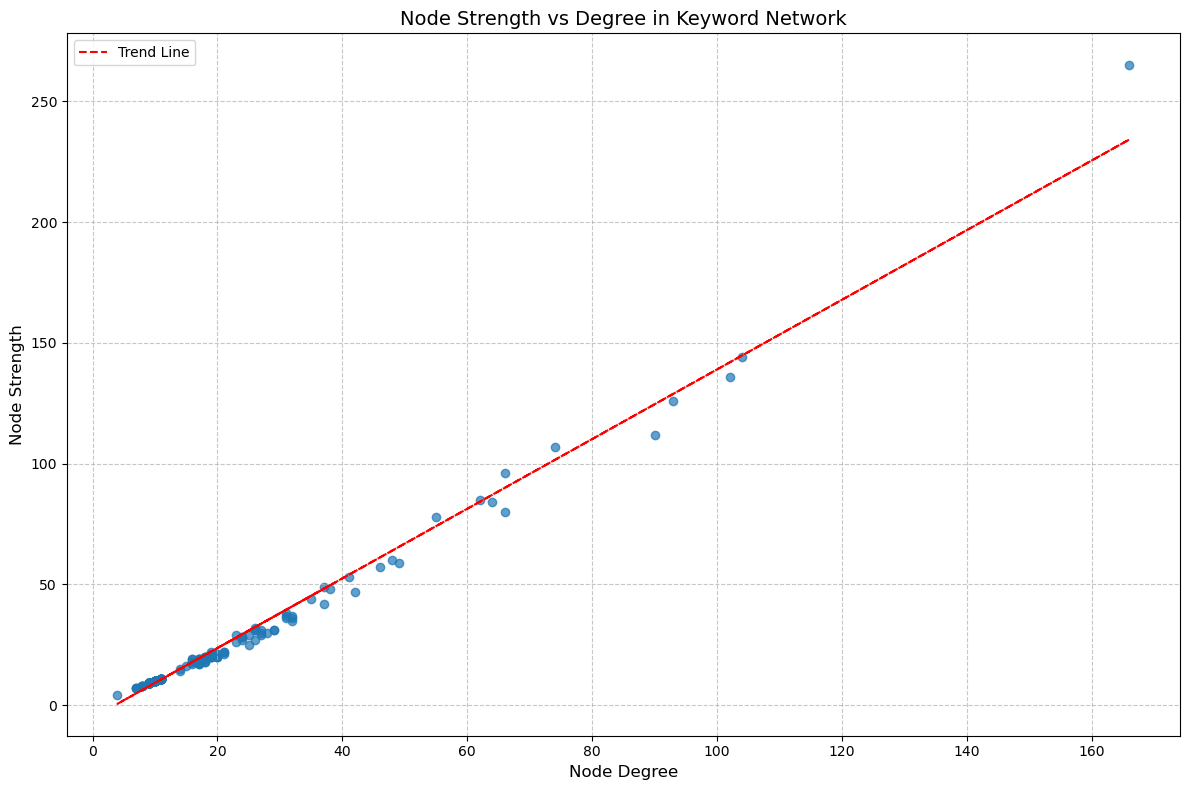

Top 10 Keywords by Degree:
                        Keyword  Degree
0       ORGANIZATIONAL behavior     166
1  ORGANIZATIONAL effectiveness     104
2            MANAGEMENT science     102
3          PERSONNEL management      93
4               DECISION making      90
5      ORGANIZATIONAL structure      74
6      ORGANIZATIONAL sociology      66
7            STRATEGIC planning      66
8         INDUSTRIAL management      64
9          CORPORATE governance      62

Top 10 Keywords by Strength:
                        Keyword  Strength
0       ORGANIZATIONAL behavior     265.0
1  ORGANIZATIONAL effectiveness     144.0
2            MANAGEMENT science     136.0
3          PERSONNEL management     126.0
4               DECISION making     112.0
5      ORGANIZATIONAL structure     107.0
6      ORGANIZATIONAL sociology      96.0
7          CORPORATE governance      85.0
8         INDUSTRIAL management      84.0
9            STRATEGIC planning      80.0

Top 10 Node Pairs by Weight:
           

In [149]:
# Execute the analysis
matrix_df = pd.read_csv('keyword_adjacency_matrix.csv', index_col=0)
G, degrees, strengths = compute_network_metrics(matrix_df)
top_degree_nodes, top_strength_nodes = get_top_nodes(degrees, strengths)
top_node_pairs = get_top_node_pairs(matrix_df)
plot_strength_vs_degree(degrees, strengths)

# Print results
print("Top 10 Keywords by Degree:")
print(top_degree_nodes)
print("\nTop 10 Keywords by Strength:")
print(top_strength_nodes)
print("\nTop 10 Node Pairs by Weight:")
print(top_node_pairs)